In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: xlabel='target', ylabel='count'>

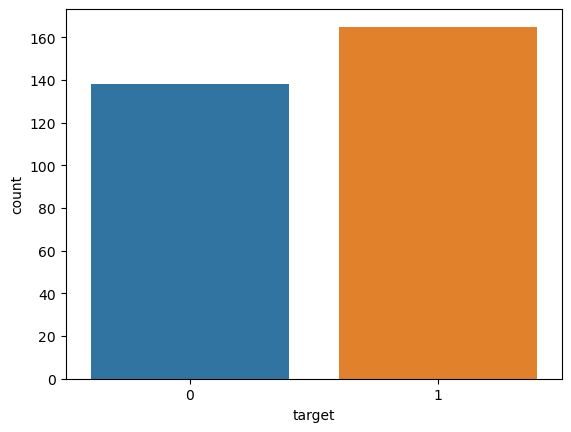

In [5]:
sns.countplot(x = 'target', data = df)

<Axes: >

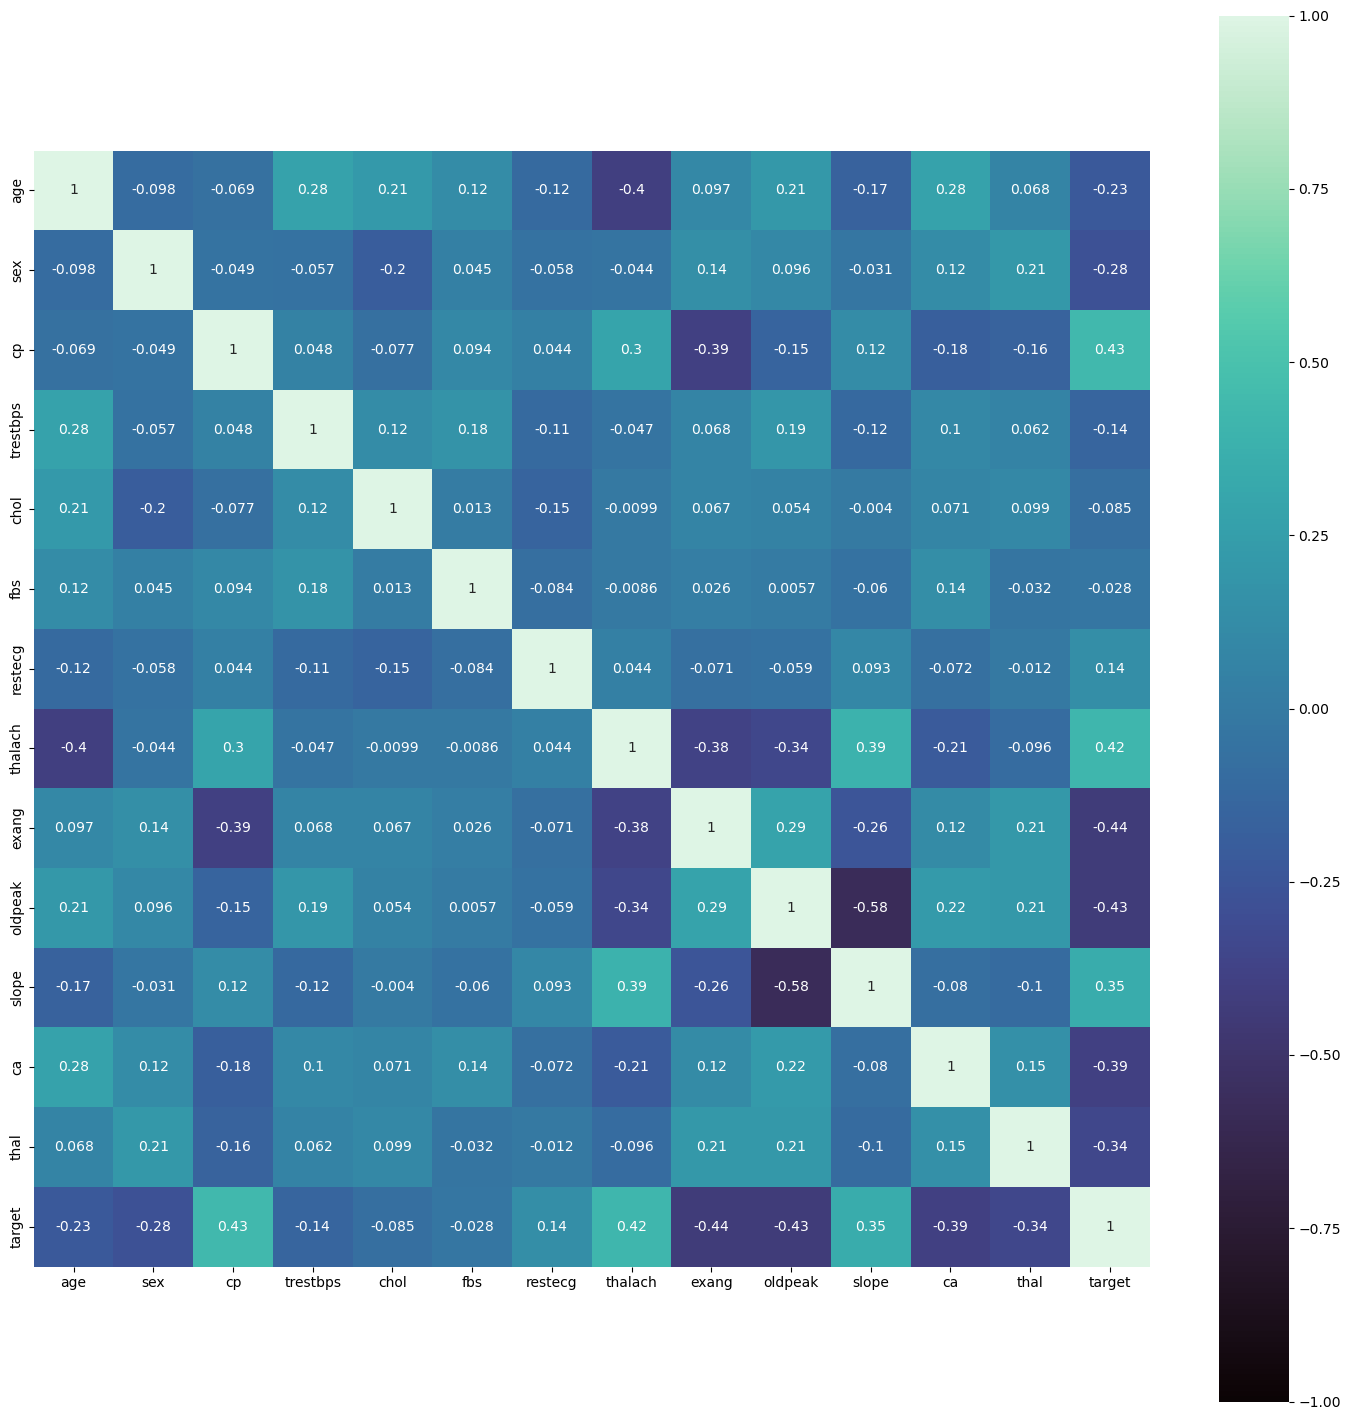

In [7]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='mako',annot=True, square=True)

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

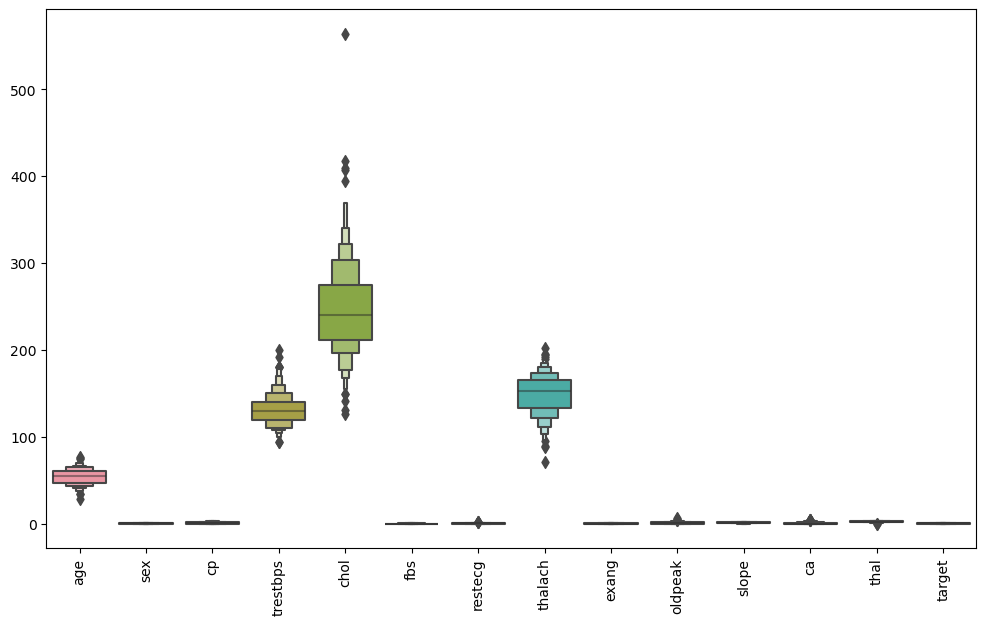

In [8]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
df.shape

(303, 14)

In [13]:
print('mean of chol: ',df.chol.mean())

mean of chol:  246.26402640264027


In [16]:
df = df[(df["chol"]<380.0)&(df["chol"]>-2.0)]

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

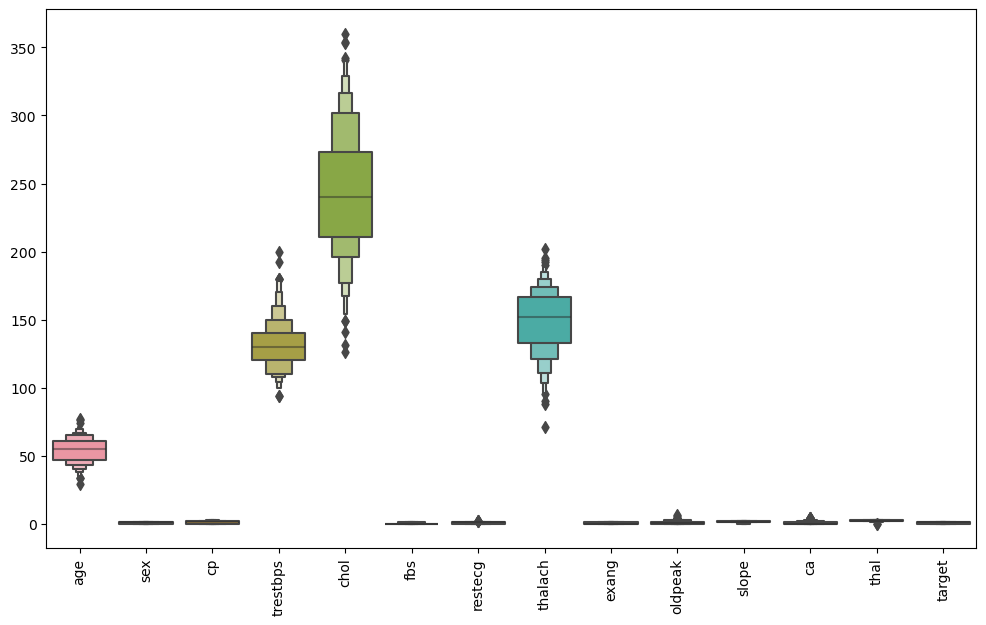

In [17]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [19]:
x = df.drop('target', axis=1)
y = df['target']

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30)
dt_model = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30)
knn_model = KNeighborsClassifier(n_neighbors=3)
logistic_model = LogisticRegression()
NB_model = MultinomialNB()

In [25]:
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_leaf_nodes=80, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [26]:
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, random_state=42)

In [27]:
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [28]:
logistic_model.fit(xtrain, ytrain)

C:\Users\Aakash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
NB_model.fit(xtrain, ytrain)

MultinomialNB()

In [31]:
rf_score = rf_model.score(xtest, ytest)
knn_score = knn_model.score(xtest, ytest)
dt_score = dt_model.score(xtest, ytest)
logistic_score = logistic_model.score(xtest, ytest)
NB_score = NB_model.score(xtest, ytest)

In [32]:
print('Random Forest Classifier Score : ', rf_score)
print('KNeighborsClassifier Score : ', knn_score)
print('Decission Tree Classifier Score : ', dt_score)
print('Logistic Regression Score : ', logistic_score)
print('Multinomial Navy Baise Score: ', NB_score)

Random Forest Classifier Score :  0.75
KNeighborsClassifier Score :  0.5666666666666667
Decission Tree Classifier Score :  0.7166666666666667
Logistic Regression Score :  0.75
Multinomial Navy Baise Score:  0.6666666666666666


In [33]:
y_pred = rf_model.predict(xtest)

<Axes: >

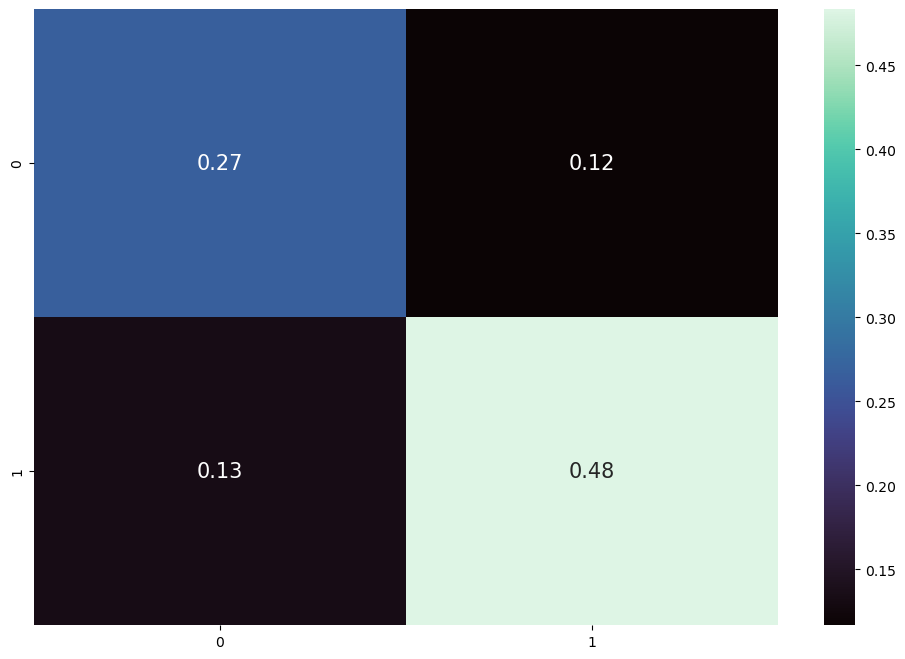

In [35]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = 'mako', annot = True, annot_kws = {'size':15})

In [36]:
import pickle

# Assuming 'model' is the trained RandomForestRegressor
with open('heart_desies_rfmodel.pkl', 'wb') as file:
    pickle.dump(dt_model, file)